In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df=pd.read_csv("C:\\Users\\asus\\Desktop\\BDDA TEXT\\MUSIC\\genres_v2.csv",low_memory=False)

In [4]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [5]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
df['mode'].value_counts()

1    23245
0    19060
Name: mode, dtype: int64

In [7]:
df.drop(['song_name','Unnamed: 0','title'],axis=1,inplace=True)

In [8]:
df['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [10]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [11]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [13]:
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

<AxesSubplot:xlabel='mode', ylabel='count'>

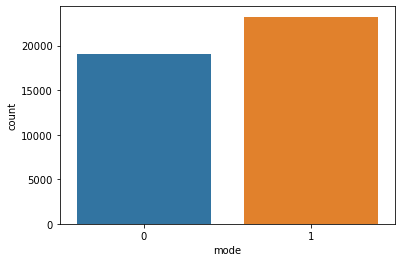

In [14]:
sns.countplot(x="mode", data=df)

Text(0.5, 1.0, 'Number of types of genres ')

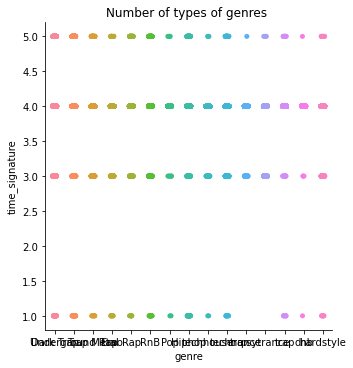

In [15]:
sns.catplot(x="genre", y="time_signature", data=df)
plt.title("Number of types of genres ")

In [16]:
cat_columns=['mode']
num_columns=['energy','key','danceability','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [17]:
num_data = df[num_columns]
num_data.head()
print("\n-----\n")
num_data.shape    
print("\n-----\n")   
num_data.columns

,energy,key,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.814,2,0.831,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.493,8,0.719,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.893,5,0.850,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.781,0,0.476,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.624,2,0.798,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988



-----



(42305, 10)


-----



Index(['energy', 'key', 'danceability', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [18]:
ss= StandardScaler()

In [19]:
nc = ss.fit_transform(num_data.loc[:,num_columns])

In [20]:
nc.shape

(42305, 10)

In [21]:
nc = pd.DataFrame(nc, columns = num_columns)
nc.head(2)

,energy,key,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.280079,-0.919298,1.223608,-0.305514,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876
1,-1.466185,0.717318,0.508480,-0.259954,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564


In [22]:
nc['mode'] = df['mode']
nc['genre']=df['genre']
nc.shape

(42305, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'energy'),
  Text(1, 0, 'key'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'speechiness'),
  Text(5, 0, 'acousticness'),
  Text(6, 0, 'instrumentalness'),
  Text(7, 0, 'liveness'),
  Text(8, 0, 'valence'),
  Text(9, 0, 'tempo'),
  Text(10, 0, 'mode')])

Text(0.5, 1.0, 'Parallel chart with music data')

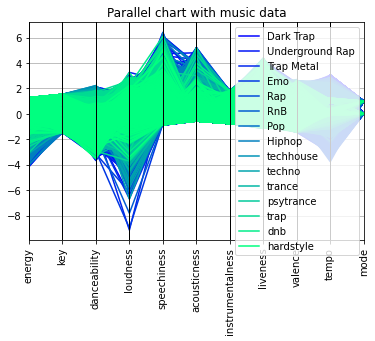

In [23]:
fig1 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'genre',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with music data")

<AxesSubplot:>

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Andrews curve with music data')

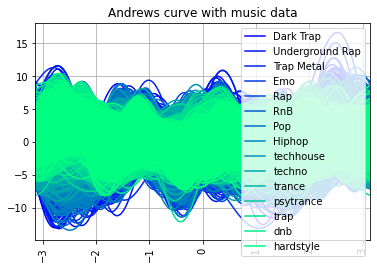

In [24]:
fig2 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'genre',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with music data")

<AxesSubplot:>

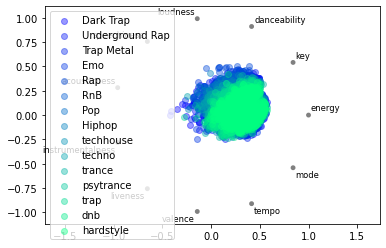

In [25]:
fig3 = plt.figure()
pd.plotting.radviz(nc,
                  'genre',
                  colormap = plt.cm.winter,
                  alpha=0.4
                  )

In [26]:
from sklearn.impute import SimpleImputer
Pipe=Pipeline(steps=[("simp_imputer",SimpleImputer(strategy='median')),("stand_scale",StandardScaler())])

In [27]:
Pipe.fit_transform(df[num_columns])

array([[ 0.2800791 , -0.91929801,  1.22360786, ..., -0.90263701,
         0.13678982,  0.39887636],
       [-1.46618532,  0.71731784,  0.50847965, ..., -0.54723051,
        -0.99958607, -1.35856366],
       [ 0.70984511, -0.10099009,  1.34492425, ...,  0.89945622,
        -1.36365518,  2.95986132],
       ...,
       [ 0.31815963,  0.71731784, -1.77737659, ...,  0.97349924,
        -0.99958607,  0.31290208],
       [ 0.86216724,  0.17177922, -1.03670809, ..., -0.89181534,
         0.56132271,  0.10769616],
       [ 0.99272907,  0.99008715, -0.70468428, ...,  1.13867213,
        -0.95670396,  0.31759921]])

In [28]:
from sklearn.preprocessing import OneHotEncoder
nf=Pipeline(steps=[("simp_imputer",SimpleImputer(strategy='constant')),("one_hot_encoder",OneHotEncoder())])

In [29]:
nf.fit_transform(df[cat_columns])

<42305x2 sparse matrix of type '<class 'numpy.float64'>'
	with 42305 stored elements in Compressed Sparse Row format>

In [30]:
ct = ColumnTransformer([('nc', Pipe, num_columns), ('cp', nf, cat_columns)])

In [31]:
ct.fit_transform(df)

array([[ 0.2800791 , -0.91929801,  1.22360786, ...,  0.39887636,
         0.        ,  1.        ],
       [-1.46618532,  0.71731784,  0.50847965, ..., -1.35856366,
         0.        ,  1.        ],
       [ 0.70984511, -0.10099009,  1.34492425, ...,  2.95986132,
         0.        ,  1.        ],
       ...,
       [ 0.31815963,  0.71731784, -1.77737659, ...,  0.31290208,
         0.        ,  1.        ],
       [ 0.86216724,  0.17177922, -1.03670809, ...,  0.10769616,
         1.        ,  0.        ],
       [ 0.99272907,  0.99008715, -0.70468428, ...,  0.31759921,
         0.        ,  1.        ]])

In [32]:
y = df.pop('genre')
X = df

In [33]:
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )

In [34]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}"

'X_train shape: (33844, 18)'

'X_test.shape : (8461, 18)'

'y_train shape: (33844,)'

'y_test shape : (8461,)'

In [35]:
pt = Pipeline([ ('ct', ct),
              ('dt', DecisionTreeClassifier())])

In [36]:
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('simp_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_scale',
                                                                   StandardScaler())]),
                                                  ['energy', 'key',
                                                   'danceability', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                                                 ('cp',
                       

In [37]:
pt.predict(X_test)

array(['Hiphop', 'Hiphop', 'dnb', ..., 'techhouse', 'techhouse',
       'Dark Trap'], dtype=object)

In [38]:
y_test

21487             Hiphop
7704     Underground Rap
38521                dnb
18139                Pop
26575             techno
              ...       
16703                RnB
35213               trap
24032          techhouse
23972          techhouse
13575                Emo
Name: genre, Length: 8461, dtype: object

In [39]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('simp_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_scale',
                                                                   StandardScaler())]),
                                                  ['energy', 'key',
                                                   'danceability', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                                                 ('cp',
                                                  Pipeline(steps=[('simp_imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['mode'])])),
                ('dt', DecisionTreeClassifier())])

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve

In [41]:
pt.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(transformers=[('nc',
                                    Pipeline(steps=[('simp_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('stand_scale',
                                                     StandardScaler())]),
                                    ['energy', 'key', 'danceability', 'loudness',
                                     'speechiness', 'acousticness',
                                     'instrumentalness', 'liveness', 'valence',
                                     'tempo']),
                                   ('cp',
                                    Pipeline(steps=[('simp_imputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('one_hot_encoder',
                                                     OneHotEncoder())]),
   

In [42]:
parameters = {
              'dt__max_depth': [4,10],
              'dt__min_impurity_decrease':[0,1],
              'dt__min_samples_leaf': [2,3],
              'dt__criterion': ["gini", "entropy"]
              }               

In [43]:
grid_search = GridSearchCV(estimator=pt,           # pipeline object
                           param_grid=parameters,  # possible parameters
                           scoring = ['accuracy'], # Metrics for performance
                           cv=5,                   # No of folds
                           n_jobs=-1,              # USe parallel cpu threads
                           verbose =1,             # Higher the value, more the verbosity
                           refit = 'accuracy'      # Refitting final model on what parameters Those which maximise auc   
                           )
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('nc',
                                                                         Pipeline(steps=[('simp_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('stand_scale',
                                                                                          StandardScaler())]),
                                                                         ['energy',
                                                                          'key',
                                                                          'danceability',
                                                                          'loudness',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                                          'liveness',
                                                                          'valence',
                                                                          'tempo']),
                                                                        ('cp',
                                                                         Pipeline(steps=[('simp_imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('one_hot_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['mode'])])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [4, 10],
                         'dt__min_impurity_decrease': [0, 1],
                         'dt__min_samples_leaf': [2, 3]},
             refit='accuracy', scoring=['accuracy'], verbose=1)

Cross-validation score: 0.5996925037552995
Test score: 0.6082023401489186


In [44]:
rs = RandomizedSearchCV(
                           estimator=pt,   # pipeline object
                           param_distributions=parameters, # possible parameters
                           scoring = ['accuracy'], #Metrics for performance
                           cv=5,               # No of folds
                           n_jobs=-1,          # USe parallel cpu threads 
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'accuracy'  # Refitting final model on what parameters Those which maximise auc   
                        )
rs.fit(X_train, y_train)
cv_score = rs.best_score_
test_score = rs.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('nc',
                                                                               Pipeline(steps=[('simp_imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('stand_scale',
                                                                                                StandardScaler())]),
                                                                               ['energy',
                                                                                'key',
                                                                                'danceability',
                                                                                'loudness',
                                                                                'speechiness',
                                                                                'acousticness',
                                                                                'instrumentalness',
                                                                                'liveness',
                                                                                'valence',
                                                                                'tempo']),
                                                                              ('cp',
                                                                               Pipeline(steps=[('simp_imputer',
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('one_hot_encoder',
                                                                                                OneHotEncoder())]),
                                                                               ['mode'])])),
                                             ('dt', DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': [4, 10],
                                        'dt__min_impurity_decrease': [0, 1],
                                        'dt__min_samples_leaf': [2, 3]},
                   refit='accuracy', scoring=['accuracy'], verbose=1)

Cross-validation score: 0.599603833810582
Test score: 0.6077295827916323
